# Linear Regression Model
In this notebook I look at baseball data from 2012-2019 and create a linear model for coorelating team run differential (runs scored - runs allowed) to total number of wins and win percentage.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [2]:
df_yearly_records = pd.read_csv('2012-2019_team_records.csv')
df_yearly_records

,Team Name,Team Abbreviation,Year,League,Division,Games,Wins,Loses,Ties,Win_Percentage,Games_Back,Runs_Scored,Runs_Allowed
0,Washington Nationals,WSN,2012,National,East,162,98,64,0,0.605,-,731,594
1,Atlanta Braves,ATL,2012,National,East,162,94,68,0,0.580,4,700,600
2,Philadelphia Phillies,PHI,2012,National,East,162,81,81,0,0.500,17,684,680
3,New York Mets,NYM,2012,National,East,162,74,88,0,0.457,24,650,709
4,Miami Marlins,MIA,2012,National,East,162,69,93,0,0.426,29,609,724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Houston Astros,HOU,2019,American,West,162,107,55,0,0.660,-,920,640
236,Oakland Athletics,OAK,2019,American,West,162,97,65,0,0.599,10,845,680
237,Texas Rangers,TEX,2019,American,West,162,78,84,0,0.481,29,810,878
238,Anaheim Angels,LAA,2019,American,West,162,72,90,0,0.444,35,769,868


## Data Formatting

In [3]:
def get_teams():
    teams = [item.strip() for item in open("all_teams.txt",'r')]
    return teams

teams = get_teams()

In [4]:
team_stat_dict = {}
for team in teams:
    team_stat_dict[team] = pd.read_csv(f"Data\\Team_Players\\2019__{team}_Players.csv")
team_stat_dict['SEA']

,Player,G,AB,R,H,2B,3B,HR,RBI,BB,...,SF,XI,ROE,GDP,SB,CS,AVG,OBP,SLG,BFW
0,Austin Adams,29,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,R.J. Alaniz,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,0.0
2,Dan Altavilla,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,0.0
3,Shawn Armstrong,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,0.0
4,Anthony Bass,44,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Mac Williamson,25,77,10,14,0,0,3,10,9,...,0,0,1,1,0,1,0.182,0.276,0.299,-0.4
65,Matt Wisler,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,0.0
66,Mike Wright,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,0.0
67,Total,2347,5500,758,1305,254,28,239,730,588,...,37,2,57,83,115,47,0.237,0.316,0.424,-3.6


In [5]:
team_overall = {}
for team in teams:
    df = team_stat_dict[team]
    team_overall[team] = df.iloc[-2:,-4:]
team_overall['SEA']

,AVG,OBP,SLG,BFW
67,0.237,0.316,0.424,-3.6
68,0.263,0.326,0.469,NaN


In [6]:
new = df_yearly_records[df_yearly_records['Year'] == 2019]
new.head()

,Team Name,Team Abbreviation,Year,League,Division,Games,Wins,Loses,Ties,Win_Percentage,Games_Back,Runs_Scored,Runs_Allowed
210,Atlanta Braves,ATL,2019,National,East,162,97,65,0,0.599,-,855,743
211,Washington Nationals,WSN,2019,National,East,162,93,69,0,0.574,4,873,724
212,New York Mets,NYM,2019,National,East,162,86,76,0,0.531,11,791,737
213,Philadelphia Phillies,PHI,2019,National,East,162,81,81,0,0.500,16,774,794
214,Miami Marlins,MIA,2019,National,East,162,57,105,0,0.352,40,615,808


In [7]:
for item in ['AVG','OBP','SLG','BFW','O_AVG', 'O_OBP', 'O_SLG']:
    new[item] = np.nan
new.head()

C:\Users\Kyle\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Team Name,Team Abbreviation,Year,League,Division,Games,Wins,Loses,Ties,Win_Percentage,Games_Back,Runs_Scored,Runs_Allowed,AVG,OBP,SLG,BFW,O_AVG,O_OBP,O_SLG
210,Atlanta Braves,ATL,2019,National,East,162,97,65,0,0.599,-,855,743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,Washington Nationals,WSN,2019,National,East,162,93,69,0,0.574,4,873,724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,New York Mets,NYM,2019,National,East,162,86,76,0,0.531,11,791,737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,Philadelphia Phillies,PHI,2019,National,East,162,81,81,0,0.500,16,774,794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,Miami Marlins,MIA,2019,National,East,162,57,105,0,0.352,40,615,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
player_stats = np.zeros((len(teams),7))
for i,team in zip(list(range(len(teams))),new['Team Abbreviation'].values):
    #print(i,team)
    player_stats[i] = (np.ravel(team_overall[team].values)[:-1])
                      
for item,column in zip(player_stats.T, ['AVG','OBP','SLG','BFW','O_AVG', 'O_OBP', 'O_SLG']):
    new[column] = item

new.head()


C:\Users\Kyle\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Team Name,Team Abbreviation,Year,League,Division,Games,Wins,Loses,Ties,Win_Percentage,Games_Back,Runs_Scored,Runs_Allowed,AVG,OBP,SLG,BFW,O_AVG,O_OBP,O_SLG
210,Atlanta Braves,ATL,2019,National,East,162,97,65,0,0.599,-,855,743,0.258,0.336,0.452,5.0,0.256,0.329,0.419
211,Washington Nationals,WSN,2019,National,East,162,93,69,0,0.574,4,873,724,0.265,0.342,0.454,3.4,0.244,0.314,0.412
212,New York Mets,NYM,2019,National,East,162,86,76,0,0.531,11,791,737,0.257,0.328,0.442,4.9,0.251,0.317,0.418
213,Philadelphia Phillies,PHI,2019,National,East,162,81,81,0,0.500,16,774,794,0.246,0.319,0.427,-3.0,0.261,0.332,0.453
214,Miami Marlins,MIA,2019,National,East,162,57,105,0,0.352,40,615,808,0.246,0.319,0.427,-3.0,0.261,0.332,0.453


In [9]:
#new.to_csv("2019_team_records_extra.csv", index=False)

## Look for linear relationships in more advanced data

In [51]:
df = pd.read_csv("2019_team_records_extra.csv")
df[df['Wins'] > 95]

,Team Name,Team Abbreviation,Year,League,Division,Games,Wins,Loses,Ties,Win_Percentage,Games_Back,Runs_Scored,Runs_Allowed,AVG,OBP,SLG,BFW,O_AVG,O_OBP,O_SLG
0,Atlanta Braves,ATL,2019,National,East,162,97,65,0,0.599,-,855,743,0.258,0.336,0.452,5.0,0.256,0.329,0.419
10,Los Angeles Dodgers,LAD,2019,National,West,162,106,56,0,0.654,-,886,613,0.257,0.338,0.472,11.2,0.223,0.282,0.379
15,New York Yankees,NYY,2019,American,East,162,103,59,0,0.636,-,943,739,0.267,0.339,0.490,11.2,0.248,0.314,0.439
16,Tampa Bay Rays,TBR,2019,American,East,162,96,66,0,0.593,7,769,656,0.254,0.325,0.431,-0.5,0.230,0.294,0.386
20,Minnesota Twins,MIN,2019,American,Central,162,101,61,0,0.623,-,939,754,0.270,0.338,0.494,7.3,0.257,0.316,0.419
25,Houston Astros,HOU,2019,American,West,162,107,55,0,0.660,-,920,640,0.274,0.352,0.495,12.8,0.221,0.283,0.397
26,Oakland Athletics,OAK,2019,American,West,162,97,65,0,0.599,10,845,680,0.249,0.327,0.448,1.6,0.242,0.308,0.404


In [52]:
y = df['Win_Percentage'].values
y_wins = df['Wins'].values

X_scored = df['Runs_Scored'].values
X_allowed = df['Runs_Allowed'].values
X_delta = X_scored - X_allowed
X_delta_p = X_scored / X_allowed

X_AVG = df['AVG'].values
X_OBP = df['OBP'].values
X_SLG = df['SLG'].values
X_BFW = df['BFW'].values

X_O_AVG = df['O_AVG'].values
X_O_OBP = df['O_OBP'].values
X_O_SLG = df['O_SLG'].values

#combine team run differential with avg player stats
X_ALL = df[df.columns[-7:]].values
X_ALL = np.concatenate((X_delta_p.reshape(-1,1), X_ALL),axis=1)

In [69]:
X_ALL.shape

(30, 8)

# Average Player Metrics as a predictor of team success
The prediction power of team average player statistics are weaker overall than run differential statistics. (66% for BFW vs 88% for run differential.)  The strongest team avg player stat to run differential is:

## OBP and BFW seem to coorelate strongest with the number of wins

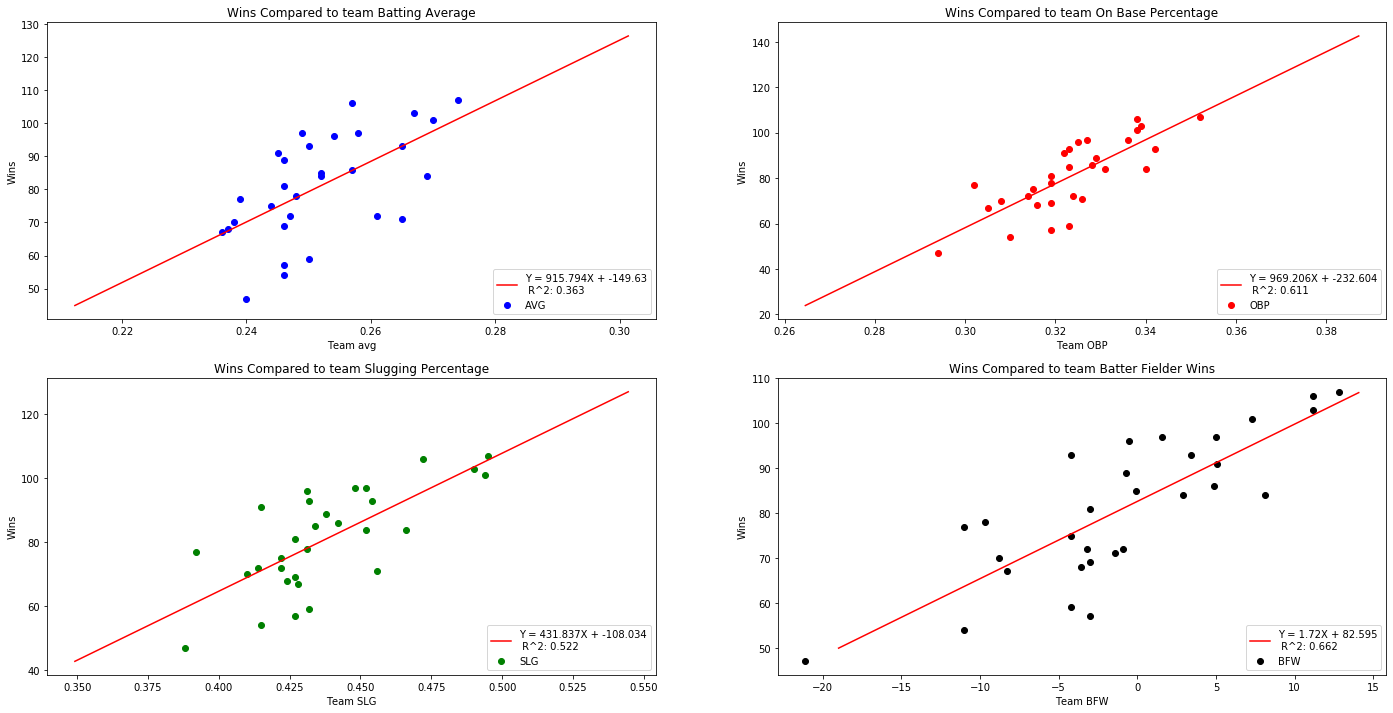

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(24,12))
ax1.scatter(X_AVG, y_wins, color='blue', label='AVG')
ax2.scatter(X_OBP, y_wins, color='red', label='OBP')
ax3.scatter(X_SLG, y_wins, color='green', label='SLG')
ax4.scatter(X_BFW, y_wins, color='black', label='BFW')
#plt.scatter(X_, y_wins, color='blue', label='run delta')

ax1.set_xlabel('Team avg')
ax1.set_ylabel('Wins')
ax1.set_title('Wins Compared to team Batting Average')


ax2.set_xlabel('Team OBP')
ax2.set_ylabel('Wins')
ax2.set_title('Wins Compared to team On Base Percentage')


ax3.set_xlabel('Team SLG')
ax3.set_ylabel('Wins')
ax3.set_title('Wins Compared to team Slugging Percentage')


ax4.set_xlabel('Team BFW')
ax4.set_ylabel('Wins')
ax4.set_title('Wins Compared to team Batter Fielder Wins')

for i,X,axes in zip(range(4),[X_AVG, X_OBP, X_SLG, X_BFW],[ax1,ax2,ax3,ax4]):
    LR = LinearRegression().fit(X.reshape(-1,1),y_wins)
    M_X = LR.coef_
    B_X = LR.intercept_
    X_fit = np.linspace(.9*np.amin(X),1.1*np.amax(X),100)
    y_fit = M_X * X_fit + B_X
    axes.plot(X_fit, y_fit, color='red', label=f'Y = {round(M_X[0],3)}X + {round(B_X,3)}\n R^2: {round(LR.score(X.reshape(-1,1),y_wins),3)}')
    
ax1.legend(loc="lower right")
ax2.legend(loc="lower right")
ax3.legend(loc="lower right")
ax4.legend(loc="lower right")

plt.show()

## OBP and BFW also coorelate strongest with the run differential (whish we know is a VERY strong predictor of the number of wins)

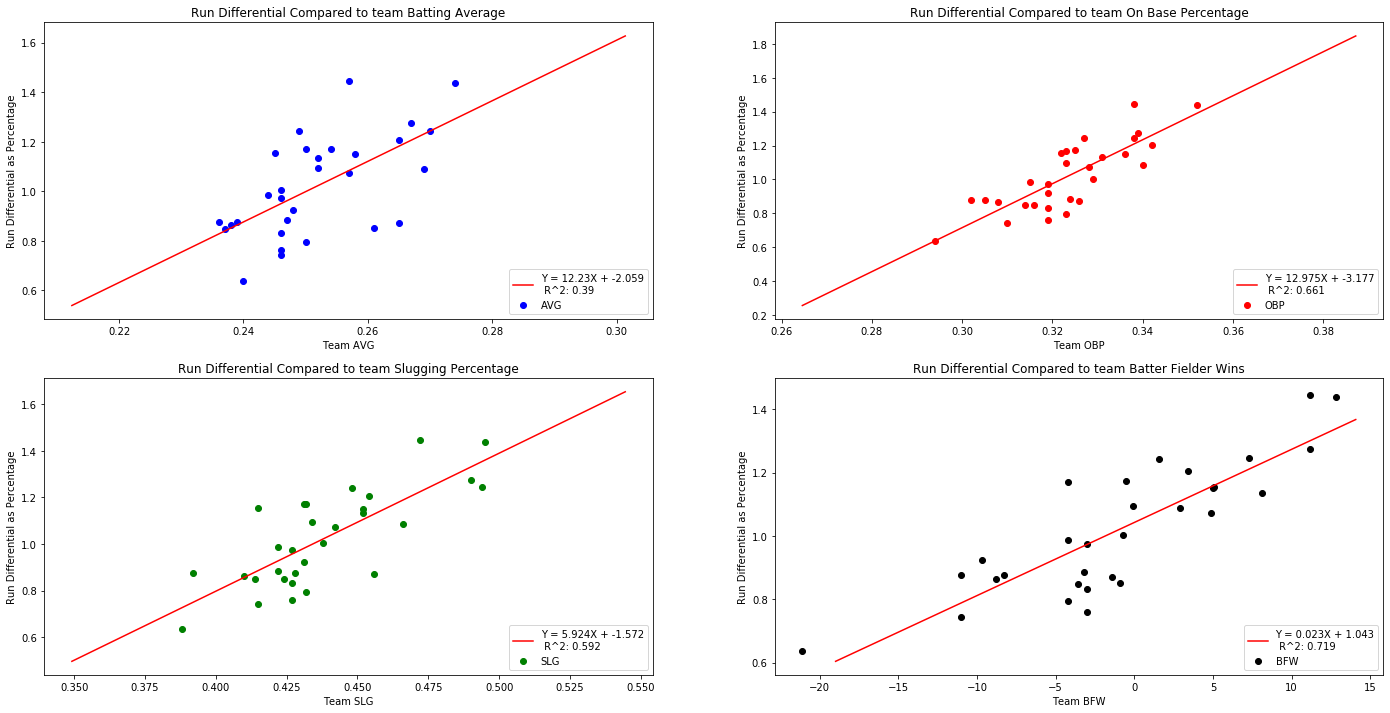

In [54]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(24,12))
ax1.scatter(X_AVG, X_delta_p, color='blue', label='AVG')
ax2.scatter(X_OBP, X_delta_p, color='red', label='OBP')
ax3.scatter(X_SLG, X_delta_p, color='green', label='SLG')
ax4.scatter(X_BFW, X_delta_p, color='black', label='BFW')
#plt.scatter(X_, y_wins, color='blue', label='run delta')

ax1.set_xlabel('Team AVG')
ax2.set_xlabel('Team OBP')
ax3.set_xlabel('Team SLG')
ax4.set_xlabel('Team BFW')

ax1.set_ylabel('Run Differential as Percentage')
ax2.set_ylabel('Run Differential as Percentage')
ax3.set_ylabel('Run Differential as Percentage')
ax4.set_ylabel('Run Differential as Percentage')

ax1.set_title('Run Differential Compared to team Batting Average')
ax2.set_title('Run Differential Compared to team On Base Percentage')
ax3.set_title('Run Differential Compared to team Slugging Percentage')
ax4.set_title('Run Differential Compared to team Batter Fielder Wins')



for i,X,axes in zip(range(4),[X_AVG, X_OBP, X_SLG, X_BFW],[ax1,ax2,ax3,ax4]):
    LR = LinearRegression().fit(X.reshape(-1,1),X_delta_p)
    M_X = LR.coef_
    B_X = LR.intercept_
    X_fit = np.linspace(.9*np.amin(X),1.1*np.amax(X),100)
    y_fit = M_X * X_fit + B_X
    axes.plot(X_fit, y_fit, color='red', label=f'Y = {round(M_X[0],3)}X + {round(B_X,3)}\n R^2: {round(LR.score(X.reshape(-1,1),X_delta_p),3)}')

ax1.legend(loc="lower right")
ax2.legend(loc="lower right")
ax3.legend(loc="lower right")
ax4.legend(loc="lower right")
plt.show()

## Lets look at accuracy with all stats (2019 Season)
Using a standard train/test split it achieves 93.5% accuracy.  Including all the data achieves 94%.  For 2019 you can see that run differential predicts 93%, so this improves by 1%

In [56]:
scaler = StandardScaler()
X_transform = scaler.fit_transform(X_ALL)

X_train, X_test, y_train, y_test = \
    train_test_split(X_transform, y_wins, 
                     test_size=0.25,                     
                     random_state=1)

In [57]:
#standard split
LR = LinearRegression().fit(X_train,y_train)
print(f'Score for all extra stats: {LR.score(X_test,y_test)}')
M_X = LR.coef_
B_X = LR.intercept_
print(f'Slope: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')

Score for all extra stats: 0.9353791978821173
Slope: [18.3  0.   2.4 -3.6 -0.6 -0.   1.8  0.7]
Intercept: 81.23722159322946


In [66]:
#all data included
LR = LinearRegression().fit(X_ALL, y_wins)
print(f'Score for all extra stats: {LR.score(X_ALL,y_wins)}')
M_X = LR.coef_
B_X = LR.intercept_
print(f'Slope: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')

Score for all extra stats: 0.9437084423943521
Slope: [ 84.9  -6.8 157.3 -95.3  -0.1 215.2  51.6 -69.9]
Intercept: -53.58218022608645


In [67]:
#just the run differential stat accounts for a lot
LR2 = LinearRegression().fit(X_delta_p.reshape(-1,1),y_wins)
print(f'Score for all extra stats: {LR2.score(X_delta_p.reshape(-1,1),y_wins)}')
M_X = LR2.coef_
B_X = LR2.intercept_
print(f'Slope: {LR2.coef_}')
print(f'Intercept: {LR2.intercept_}')

Score for all extra stats: 0.9310639401731032
Slope: [74.9]
Intercept: 4.485343862129142


## Run differential explains the vast majority of the variance

In [19]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array(X_transform)

# calculate the mean of each column
M = mean(A.T, axis=1)

# center columns by subtracting column means
C = A - M

# calculate covariance matrix of centered matrix. This is how much each columns varies with other columns
V = cov(C.T)

# eigendecomposition of covariance matrix.  The larger the eigenvalue, the more it matters
values, vectors = eig(V)
print(f'Eigenvalues: {values}')

# project data using the covariance matrix and the eigenvectors
P = vectors.T.dot(C.T)

xval = np.array([item[0] for item in P.T])
yval = np.array([item[1] for item in P.T])

Eigenvalues: [5.79812653 1.7497864  0.23973965 0.17260964 0.13425582 0.03163087
 0.06939455 0.08031861]


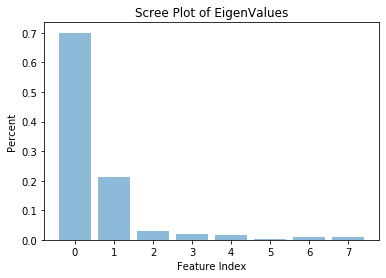

In [20]:
def create_scree(vector):
    total = sum(vector)
    percent = vector/total
    return percent

import matplotlib.pyplot as plt

plt.title('Scree Plot of EigenValues')
plt.ylabel('Percent')
plt.xlabel('Feature Index')
plt.bar([x for x in range(len(values))], create_scree(values), align='center', alpha=0.5)
plt.show()

## Transforming the dataset first with PCA or LDA doesn't do anything

In [21]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# no value for PCA components
pipe_lr = make_pipeline(PCA(),
                        LinearRegression())
pipe_lr.fit(X_train,y_train)
print(f'PCA components unset: {round(pipe_lr.score(X_test,y_test),3)}')

pipe_lr2 = make_pipeline(LinearRegression())                                       

pipe_lr2.fit(X_train,y_train)
print(f'No PCA: {round(pipe_lr2.score(X_test,y_test),3)}')

pipe_lr3 = make_pipeline(LDA(),LinearRegression())                                       

pipe_lr3.fit(X_train,y_train)
print(f'LDA: {round(pipe_lr2.score(X_test,y_test),3)}')

PCA components unset: 0.935
No PCA: 0.935
LDA: 0.935


## 2012-2019 All Team Stats

In [5]:
df = pd.read_csv("2012-2019_team_player_stats.csv")
df.head()

,Team Name,Team Abbreviation,Year,League,Division,Games,Wins,Loses,Ties,Win_Percentage,Games_Back,Runs_Scored,Runs_Allowed,AVG,OBP,SLG,BFW,O_AVG,O_OBP,O_SLG
0,Atlanta Braves,ATL,2012,National,East,162,94,68,0,0.580,4,700,600,0.247,0.320,0.389,3.2,0.243,0.306,0.378
1,Washington Nationals,WSN,2012,National,East,162,98,64,0,0.605,-,731,594,0.261,0.322,0.428,5.0,0.237,0.303,0.373
2,Philadelphia Phillies,PHI,2012,National,East,162,81,81,0,0.500,17,684,680,0.255,0.317,0.400,2.8,0.251,0.306,0.407
3,New York Mets,NYM,2012,National,East,162,74,88,0,0.457,24,650,709,0.249,0.316,0.386,-2.5,0.251,0.315,0.401
4,Miami Marlins,MIA,2012,National,East,162,69,93,0,0.426,29,609,724,0.244,0.308,0.382,-5.4,0.263,0.327,0.399


In [37]:
y = df['Wins'].values
X = np.concatenate((df[['Runs_Scored','Runs_Allowed']].values, 
                   (df['Runs_Scored'].values / df['Runs_Allowed'].values).reshape(-1,1),
                    df[['AVG','OBP','SLG','BFW','O_AVG','O_OBP','O_SLG']].values),axis=1)
X_small = np.concatenate(((df['Runs_Scored'].values / df['Runs_Allowed'].values).reshape(-1,1),
                    df[['AVG','OBP','SLG','BFW','O_AVG','O_OBP','O_SLG']].values),axis=1)
X_one = (df['Runs_Scored'].values / df['Runs_Allowed'].values).reshape(-1,1)

In [38]:
X.shape

(240, 10)

In [39]:
#normal train-test split
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.25,                     
                     random_state=1)

In [40]:
#Linear Regression on Entire Dataset
LR = LinearRegression().fit(X_train, y_train)
print(f'Score for all extra stats: {LR.score(X_test,y_test)}')
M_X = LR.coef_
B_X = LR.intercept_
print(f'Slope: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')

Score for all extra stats: 0.8574665890511128
Slope: [ 9.79582353e-02 -1.29282556e-01 -1.64774296e+01  3.14446197e+01
  1.77439411e+01  4.32944391e+01 -6.72784984e-02 -7.18226983e+01
  2.16113863e+01  1.64533689e+01]
Intercept: 93.2168640434211


In [41]:
scores = cross_val_score(estimator=LR,
                             X=X,
                             y=y,
                             cv=10,
                             n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.86506197 0.88838985 0.88754537 0.87275002 0.70309014 0.86820896
 0.81306337 0.85575663 0.92157445 0.94488437]
CV accuracy: 0.862 +/- 0.063


In [43]:
#difference in games
predict = LR.predict(X)
predict_int = [int(round(i)) for i in predict]
actual = y
delta_wins = abs(predict_int-actual)
print(delta_wins)

[ 4  2  1  2  1  2  6  4  1  6  0  2  4  6  0  4  0  3  1 11  6  0  1  3
  2  5  4  1  4  2  1  1  5  1  8  4  9  0  7  2  3  1  0  0  2  2  6  5
  3  0  3  3  5  7  1  6  2  2  3  1  1  3  2  3  1  1  0  6  2  5  3  8
  4  1  2  2  5  5  2  3  2  2  5  2  4  1  7  4  3  0  4  5  1  2  5  5
  8  6  7  6  3  1  3  5  1  2  0  4  8  2  5  3  4  2  5  7  9  4  1  6
  1  1  8  1  1  2  2  1  1  2  1  3  3  3  4  6  4 11  1  4  3  3  2  1
  2  1  1  6  1 13  0  1  6  3  2  1  1  3  0  1  4  0  3  4 10  1  9  2
  4  4  3  3  0  4  7  1  3  1  1  0  2  8  4  1  4  5  3  1  1  1  8  7
  4  0  1  5  2  1  5  6  6  1  1  0  3  3  3  1 11  1  6  2  3  0  6  7
  6  0  5  7  1  5  2  5  1  3  3  3  4  0  0  3  1  3  3  2  1  2  2  6]


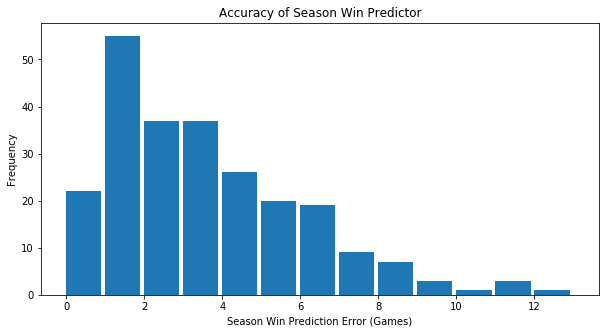

In [68]:
plt.figure(figsize=(10,5))
plt.hist(delta_wins, bins=13, align='mid', width=.9)
plt.xlabel('Season Win Prediction Error (Games)')
plt.ylabel('Frequency')
plt.title('Accuracy of Season Win Predictor')
plt.show()

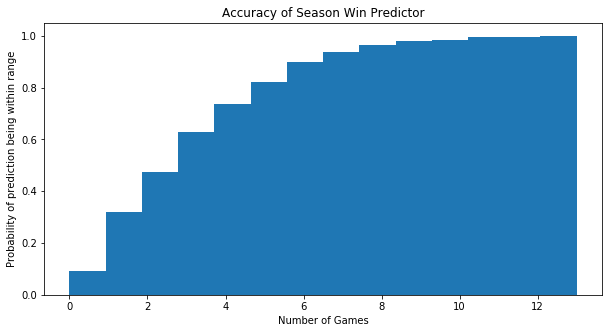

In [71]:
plt.figure(figsize=(10,5))
plt.hist(delta_wins, bins=14, align='mid', density=True, cumulative=True)
plt.xlabel('Number of Games')
plt.ylabel('Probability of prediction being within range')
plt.title('Accuracy of Season Win Predictor')
plt.show()